# Module 2 Peer Review

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date

import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict, RandomizedSearchCV, StratifiedShuffleSplit

from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, RFECV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.inspection import permutation_importance

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge


import feature_engine

from feature_engine.selection import (DropConstantFeatures, DropDuplicateFeatures, 
                                      DropCorrelatedFeatures, SmartCorrelatedSelection)
from feature_engine.selection import SelectBySingleFeaturePerformance, SelectByShuffling, RecursiveFeatureElimination
from feature_engine.selection import RecursiveFeatureAddition

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# This module lets us save our models once we fit them.
# import pickle

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**=================================================================================================================**

## Quick Data Glance

In [2]:
df = pd.read_csv("mtcars.csv")

In [3]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
2,Datsun 710,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
3,Hornet 4 Drive,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
4,Hornet Sportabout,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
df.dtypes.value_counts()

int64      6
float64    5
object     1
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
unique,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mazda RX4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.09,6.19,230.72,146.69,3.60,3.22,17.85,0.44,0.41,3.69,2.81
std,NaN,6.03,1.79,123.94,68.56,0.53,0.98,1.79,0.50,0.50,0.74,1.62
min,NaN,10.40,4.00,71.10,52.00,2.76,1.51,14.50,0.00,0.00,3.00,1.00
25%,NaN,15.43,4.00,120.83,96.50,3.08,2.58,16.89,0.00,0.00,3.00,2.00
50%,NaN,19.20,6.00,196.30,123.00,3.70,3.33,17.71,0.00,0.00,4.00,2.00
75%,NaN,22.80,8.00,326.00,180.00,3.92,3.61,18.90,1.00,1.00,4.00,4.00


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,20.09,6.19,230.72,146.69,3.60,3.22,17.85,0.44,0.41,3.69,2.81
std,6.03,1.79,123.94,68.56,0.53,0.98,1.79,0.50,0.50,0.74,1.62
min,10.40,4.00,71.10,52.00,2.76,1.51,14.50,0.00,0.00,3.00,1.00
25%,15.43,4.00,120.83,96.50,3.08,2.58,16.89,0.00,0.00,3.00,2.00
50%,19.20,6.00,196.30,123.00,3.70,3.33,17.71,0.00,0.00,4.00,2.00
75%,22.80,8.00,326.00,180.00,3.92,3.61,18.90,1.00,1.00,4.00,4.00
max,33.90,8.00,472.00,335.00,4.93,5.42,22.90,1.00,1.00,5.00,8.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include="object")

,model
count,32
unique,32
top,Mazda RX4
freq,1


In [9]:
df.shape

(32, 12)

In [10]:
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

**=================================================================================================================**

##  Linear Regression 

Let's first understand what exactly `Regression` means it is a statistical method used in finance, investing, and other disciplines that attempts to determine the `strength` and `character` of the relationship between one `dependent variable` (usually denoted by `Y`) and a series of other variables known as `independent variables`.   
`Linear Regression` is a statistical technique where based on a set of `independent variable(s)` a dependent variable is `predicted`. 

$$\huge y_{i} =\beta _{0} + \beta _{1} X_{i} + \varepsilon_{i}$$

y = dependent variable     
$ \beta_{0}$ = population of intercept    
$ \beta_{i}$ = population of co-efficient   
x = independent variable    
$ \varepsilon_{i}$ = Random error   


## Simple Linear Regression (StatsModel)

### First Model - Weight – Miles_per_Gallon(mpg)

In [11]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
2,Datsun 710,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
3,Hornet 4 Drive,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
4,Hornet Sportabout,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2


In [12]:
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

In [13]:
## X is the input variables (or independent variables)
X = df['wt']
## y is the target/dependent variable
y = df['mpg']

In [14]:
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

In [15]:
lrmodel1 = sm.OLS(y,X).fit()

In [16]:
lrprediction1 = lrmodel1.predict(X)

In [17]:
lrprediction1[0:5]

0   23.28
1   21.92
2   24.89
3   20.10
4   18.90
dtype: float64

In [18]:
# Print out the statistics
lrmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           1.29e-10
Time:                        19:33:49   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation: The Weight – Miles_per_Gallon(mpg) model estimates a decrease in mileage of 5.34 miles per gallon with 1 unit increase in weight, and about 75 % of the variation in percentage of Miles_per_Gallon is associated with variation in weight.**

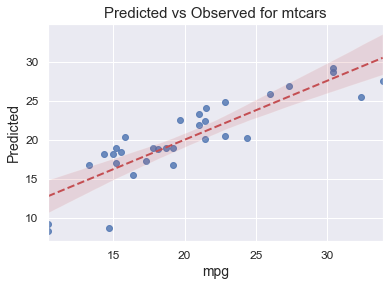

In [19]:
sns.regplot(x=y, y=lrprediction1, data=df, line_kws={"lw": 2, 'linestyle':'--','color': 'r'})
plt.title("Predicted vs Observed for mtcars", size=15)
plt.ylabel("Predicted")
plt.show()

**Interpretation: Pseudo R squared is 0.7528 . The “predicted vs observed” line is the line when our predictions are perfect. As we see the “linear fit to points” has almost similar slope, we would conclude we have a very good fit.**

### Horse_Power – Miles_per_Gallon (mpg):

In [20]:
## X is the input variables (or independent variables)
X = df['hp']
## y is the target/dependent variable
y = df['mpg']

In [21]:
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

In [22]:
lrmodel2 = sm.OLS(y,X).fit()

In [23]:
lrprediction2 = lrmodel2.predict(X)

In [24]:
lrprediction2[0:5]

0   22.59
1   22.59
2   23.75
3   22.59
4   18.16
dtype: float64

In [25]:
# prediction = pd.DataFrame(data=lrprediction, columns=['predicted'])
# prediction

In [26]:
# Print out the statistics
lrmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           1.79e-07
Time:                        19:33:49   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.000      26.762      33.436
hp            -0.0682      0.010     -6.742      0.000      -0.089      -0.048
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.984
Skew:                           0.747   Prob(JB):                        0.225
Kurtosis:                       2.935   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation: The Horse_Power – Miles_per_Gallon (mpg) model estimates a decrease in mileage of 0.06 miles per gallon with 1 unit increase in horse power, and about 60% of the variation in percentage of Miles_per_Gallon is associated with variation in horse power.**

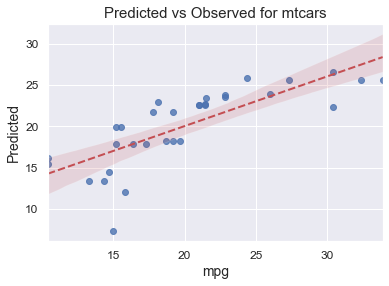

In [27]:
sns.regplot(x=y, y=lrprediction2, data=df, line_kws={"lw": 2, 'linestyle':'--','color': 'r'})
plt.title("Predicted vs Observed for mtcars", size=15)
plt.ylabel("Predicted")
plt.show()

**Interpretation: Pseudo R squared is 0.6616. The “predicted vs observed” line is the line when our predictions are perfect. As we see the “linear fit to points” has slope somewhat similar, we would conclude we have a good fit.**

### Make mpg as target and both wt & hp should be taken as input variables

In [28]:
## X is the input variables (or independent variables)
X = df[['wt','hp']]
## y is the target/dependent variable
y = df[['mpg']]

In [29]:
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

In [30]:
lrmodel3 = sm.OLS(y,X).fit()

In [31]:
lrprediction3 = lrmodel3.predict(X)

In [32]:
lrprediction3[0:5]

0   23.57
1   22.58
2   25.28
3   21.27
4   18.33
dtype: float64

In [33]:
# Print out the statistics
lrmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           9.11e-12
Time:                        19:33:50   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2273      1.599     23.285      0.000      33.957      40.497
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation: About 82% of the variation in percentage of Miles_per_Gallon is associated with variation in horse power and weight.**

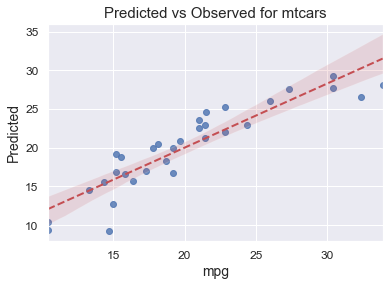

In [34]:
sns.regplot(x=y, y=lrprediction3, data=df, line_kws={"lw": 2, 'linestyle':'--','color': 'r'})
plt.title("Predicted vs Observed for mtcars", size=15)
plt.ylabel("Predicted")
plt.show()

**Interpretation: Pseudo R squared has increased to 0.82. The “predicted vs observed” line is the line when our predictions are perfect. As we see the “linear fit to points” has a slope very close to the slope of “predicted vs observed” line , we conclude we have excellent fit. This means that adding two predictors improves fit a lot.**

**=================================================================================================================**